In [136]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style='darkgrid', palette='viridis')

# Mass

In [137]:
mass = np.load('../out/mass.npy',allow_pickle='TRUE').item()
bulk = np.load('../out/bulk.npy',allow_pickle='TRUE').item()
fba = np.load('../out/fba_results.npy',allow_pickle='TRUE').item()
stoichiometry = np.load('../out/stoichiometry.npy',allow_pickle='TRUE')

<AxesSubplot:>

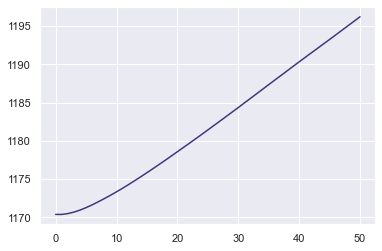

In [138]:
sns.lineplot(x=[i for i in range(len(mass['cell_mass']))],y=mass['cell_mass'])

# FBA performance

In [139]:
fba.keys()

dict_keys(['estimated_fluxes', 'estimated_homeostatic_dmdt', 'target_homeostatic_dmdt', 'target_kinetic_fluxes', 'estimated_exchange_dmdt', 'estimated_all_dmdt', 'maintenance_target', 'residuals'])

In [140]:
pd.DataFrame(fba['estimated_fluxes']).head()

,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,1.1.1.127-RXN,1.1.1.215-RXN (reverse),1.1.1.251-RXN,1.1.1.271-RXN (reverse),1.1.1.274-RXN (reverse),1.1.1.283-RXN (reverse),1.1.1.39-RXN,1.1.1.83-RXN,1.11.1.15-RXN,...,XYLISOM-RXN,XYLISOM-RXN-BETA-D-XYLOSE//D-XYLULOSE.26.,XYLISOM-RXN-CPD-15377//D-XYLULOSE.22.,XYLISOM-RXN-XYLOSE//D-XYLULOSE.19.,XYLONATE-DEHYDRATASE-RXN,XYLULOKIN-RXN,YIAE1-RXN (reverse),YIAE2-RXN (reverse),glycogen-monomer-extension,maintenance_reaction
0,0,0,0,0,0,0,0,0,0,0,...,0,147165,-670658,523493,0,0,0,0,-1,1971173
1,14,-3,9,-16,39,-1,-10,-9,-1,-1,...,-1,147164,-670659,523492,6,-4,13,-1,46,7128365
2,2,52,-3,154,149,4,-12,-72,0,35,...,-17,147162,-670736,523519,159,-69,8,-38,3792,7679648
3,30,8,0,109,15,-5,-11,-13,4,9,...,0,147202,-670830,523626,34,-1,8,-1,6985,7652307
4,55,-8,-3,89,8,-4,-3,-4,-1,2,...,3,147237,-670980,523750,0,11,11,-3,9587,7633140


In [141]:
for a, b in fba['target_kinetic_fluxes'].items():
    if len(b)!=500:
        del fba['target_kinetic_fluxes'][a]

In [142]:
for reaction in fba['target_kinetic_fluxes'].keys():
    for i in range(len(fba['target_kinetic_fluxes'][reaction])):
        print(fba['estimated_fluxes'][reaction][i], fba['target_kinetic_fluxes'][reaction][i])

In [143]:
pd.DataFrame(fba['estimated_exchange_dmdt'])

,GLC[p],CARBON-MONOXIDE[p],CPD-534[p],ETOH[p],PROTON[p],CPD-1772[c],GLYCEROL[p],L-SELENOCYSTEINE[c],CPD-10774[p],ZN+2[p],...,INDOLE[p],Pi[p],UNDECAPRENYL-DIPHOSPHATE[p],NI+2[p],CPD-564[c],CPD-108[p],SUC[p],SULFATE[p],URACIL[p],K+[p]
0,-1253319,0,0,-388588,2453640,-59,491709,0,0,0,...,-1,0,0,0,-377667,0,1068435,0,-3,2
1,-2355436,-52,-4,-540479,4216070,-25,1051292,4,9,0,...,-3735,18,16,4,-371958,-30,852362,16,-23587,6
2,-2518524,-115,75,-591586,4963889,-92,1022916,10,7,1,...,-3607,-79,81,-3,-349504,-12,925457,34,-21617,-5676
3,-2616308,-101,86,-652603,5479260,-19,976800,-2,1,2,...,-3516,6,203,3,-338449,-13,978906,-3062,-22521,-10202
4,-2656579,-103,84,-711658,5832548,-620,926469,3,1,6,...,-3875,31,237,7,-336968,-18,1030497,-3694,-19194,-14053
5,-2705723,-106,99,-750803,5903774,-25,881874,6,-2,9,...,-747,-20,315,9,-333510,-25,1068990,-5205,-22024,-16931
6,-2753054,-91,99,-782179,5962610,-9,843563,7,0,13,...,6123,20,422,12,-329144,-4,1110607,-5999,-19750,-19359
7,-2768392,-95,109,-802582,5952126,7008,808587,9,0,15,...,-3317,12,501,15,-325528,-96,1141041,-6498,-22866,-21141
8,-2783248,-19,96,-826294,5964447,7370,789684,8,1,17,...,3675,39,484,18,-324937,-16,1150370,-5693,-17434,-22106
9,-2798060,-127,103,-835585,5985434,3679,775186,10,3,19,...,5509,14,552,19,-324125,-18,1162268,-5743,-19673,-22922


In [144]:
pd.DataFrame(fba['estimated_homeostatic_dmdt']).head()

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,0,0,0,0,0,0,0,1,1,1,...,-1,0,0,0,0,0,0,0,0,0
1,38,-9,-75,-10,-4,-31,335,-23,-63,-2,...,46,4,0,3,0,-1,-2,7,15,18
2,48,16,-43,11,7,5,40,85,50,-9,...,3792,-3,4,24,1,-2,2,-176,-44,-79
3,-45,45,36,22,45,28,-15,106,102,7,...,6985,3,7,-31,2,-2,10,173,-65,6
4,14,54,21,15,44,-15,-9,143,156,6,...,9587,7,11,-6,6,1,13,46,-71,31


# Meeting homeostatic objective

In [145]:
df1 = pd.DataFrame(fba['estimated_homeostatic_dmdt'])
df1
# df1

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,0,0,0,0,0,0,0,1,1,1,...,-1,0,0,0,0,0,0,0,0,0
1,38,-9,-75,-10,-4,-31,335,-23,-63,-2,...,46,4,0,3,0,-1,-2,7,15,18
2,48,16,-43,11,7,5,40,85,50,-9,...,3792,-3,4,24,1,-2,2,-176,-44,-79
3,-45,45,36,22,45,28,-15,106,102,7,...,6985,3,7,-31,2,-2,10,173,-65,6
4,14,54,21,15,44,-15,-9,143,156,6,...,9587,7,11,-6,6,1,13,46,-71,31
5,17,63,4,27,51,32,-3,175,173,7,...,11559,9,14,9,9,3,19,2,-66,-20
6,22,73,21,29,64,17,15,223,215,-3,...,13210,12,17,11,13,7,18,37,-59,20
7,31,77,10,31,68,12,5,230,224,2,...,14424,15,19,15,15,11,20,18,-46,12
8,41,74,29,33,67,4,-6,230,256,7,...,15081,18,20,23,17,14,21,5,-32,39
9,56,82,-1,37,78,14,5,247,246,-3,...,15622,19,22,26,19,16,22,-38,-21,14


In [146]:
df1 = df1.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='update')


In [147]:
pd.DataFrame(fba['target_homeostatic_dmdt'])

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,0,0,0,0,0,0,0,1,1,1,...,-1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,361,0,0,0,...,0,0,0,0,0,0,0,32,22,6
2,-30,30,81,18,22,34,28,85,126,3,...,3829,2,6,3,6,7,8,30,13,-6
3,-63,51,133,22,47,35,-9,111,188,13,...,6993,16,13,-10,16,20,17,218,67,84
4,2,57,111,20,46,15,9,159,242,6,...,9595,27,20,35,28,36,21,59,147,92
5,12,65,106,29,55,39,23,201,273,1,...,11560,38,27,59,40,53,26,30,236,79
6,22,73,120,29,65,17,30,238,314,-3,...,13210,49,33,70,51,70,27,49,321,119
7,31,77,119,31,68,11,21,246,333,2,...,14424,59,38,81,60,85,31,33,403,121
8,31,81,130,31,69,11,21,258,353,2,...,15084,67,42,89,68,97,34,39,472,132
9,23,90,123,31,74,20,31,278,351,-5,...,15645,72,45,89,74,106,36,56,526,116


In [148]:
df2 = pd.DataFrame(fba['target_homeostatic_dmdt'])
df2 = df2.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='target')
df2

,index,timestep,target
0,2-3-DIHYDROXYBENZOATE[c],0,0
1,2-KETOGLUTARATE[c],0,0
2,2-PG[c],0,0
3,2K-4CH3-PENTANOATE[c],0,0
4,4-AMINO-BUTYRATE[c],0,0
...,...,...,...
8545,MN+2[p],49,176
8546,NA+[p],49,49
8547,OXYGEN-MOLECULE[p],49,50
8548,CA+2[p],49,900


In [149]:
df3 = df1.merge(df2, left_on=['index', 'timestep'], right_on=['index', 'timestep'])
# df3[df3['timestep'] == 900].T
df3

,index,timestep,update,target
0,2-3-DIHYDROXYBENZOATE[c],0,0,0
1,2-KETOGLUTARATE[c],0,0,0
2,2-PG[c],0,0,0
3,2K-4CH3-PENTANOATE[c],0,0,0
4,4-AMINO-BUTYRATE[c],0,0,0
...,...,...,...,...
8545,MN+2[p],49,33,176
8546,NA+[p],49,33,49
8547,OXYGEN-MOLECULE[p],49,32,50
8548,CA+2[p],49,32,900


In [150]:
df3['update'] = df3['update'].abs() 
df3['target'] = df3['target'].abs() 

df3['update'] = np.log10(df3['update'])
df3['target'] = np.log10(df3['target'])

df3

/Users/cyrus/.pyenv/versions/3.9.9/envs/viv/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,index,timestep,update,target
0,2-3-DIHYDROXYBENZOATE[c],0,-inf,-inf
1,2-KETOGLUTARATE[c],0,-inf,-inf
2,2-PG[c],0,-inf,-inf
3,2K-4CH3-PENTANOATE[c],0,-inf,-inf
4,4-AMINO-BUTYRATE[c],0,-inf,-inf
...,...,...,...,...
8545,MN+2[p],49,1.518514,2.245513
8546,NA+[p],49,1.518514,1.690196
8547,OXYGEN-MOLECULE[p],49,1.505150,1.698970
8548,CA+2[p],49,1.505150,2.954243


In [151]:
df3_subset = df3[df3['timestep'].isin([0, 1, 2, 49, 1000])]

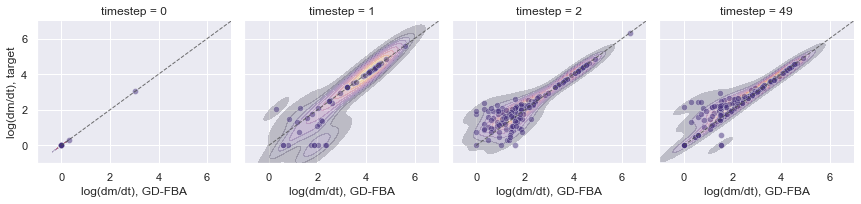

In [152]:
g = sns.FacetGrid(df3_subset, col="timestep", col_wrap=5, aspect=1, xlim=(-1,7), ylim=(-1,7))
g.map(sns.kdeplot, "update", "target", cmap="inferno", alpha=0.2, fill=True)
g.map(sns.scatterplot, "update", "target", alpha=0.5)
g.set_axis_labels("log(dm/dt), GD-FBA","log(dm/dt), target")

for ax in g.axes:
    ax.plot([0, 9], [0, 9], linewidth=1,  linestyle='--', color='.3', alpha=0.8)
    

plt.margins(0,0)

# Flux targets

# Bulk

In [153]:
bulk['GTP[c]'][0:5]

[1368010, 1349867, 1347742, 1347218, 1347093]

In [154]:
[key for key in bulk.keys() if key.startswith('GLC')]

['GLCNACPTRANS-MONOMER[o]',
 'GLC-6-P[c]',
 'GLC[j]',
 'GLC[c]',
 'GLC[e]',
 'GLC[s]',
 'GLC[m]',
 'GLC[o]',
 'GLC[p]',
 'GLC[l]',
 'GLC[i]',
 'GLC-1-P[j]',
 'GLC-1-P[c]',
 'GLC-1-P[e]',
 'GLC-1-P[s]',
 'GLC-1-P[m]',
 'GLC-1-P[o]',
 'GLC-1-P[p]',
 'GLC-1-P[l]',
 'GLC-1-P[i]',
 'GLC-6-P[j]',
 'GLC-6-P[e]',
 'GLC-6-P[s]',
 'GLC-6-P[m]',
 'GLC-6-P[o]',
 'GLC-6-P[p]',
 'GLC-6-P[l]',
 'GLC-6-P[i]',
 'GLC-D-LACTONE[j]',
 'GLC-D-LACTONE[c]',
 'GLC-D-LACTONE[e]',
 'GLC-D-LACTONE[s]',
 'GLC-D-LACTONE[m]',
 'GLC-D-LACTONE[o]',
 'GLC-D-LACTONE[p]',
 'GLC-D-LACTONE[l]',
 'GLC-D-LACTONE[i]']

In [155]:
bulk['GLC[p]'][0:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [156]:
bulk['GLC-6-P[c]'][0:5]

[2840783, 2840784, 2840714, 2840955, 2841422]

In [157]:
fba['estimated_exchange_dmdt'].keys()

dict_keys(['GLC[p]', 'CARBON-MONOXIDE[p]', 'CPD-534[p]', 'ETOH[p]', 'PROTON[p]', 'CPD-1772[c]', 'GLYCEROL[p]', 'L-SELENOCYSTEINE[c]', 'CPD-10774[p]', 'ZN+2[p]', 'UREA[p]', 'CA+2[p]', 'BUTANAL[c]', 'GLYCOLALDEHYDE[c]', 'BETAINE[p]', 'NA+[p]', 'CH33ADO[c]', 'METOH[p]', 'S-ADENOSYL-4-METHYLTHIO-2-OXOBUTANOATE[c]', 'THYMINE[p]', 'GLYCOLLATE[c]', 'MI-PENTAKISPHOSPHATE[p]', 'AMMONIUM[c]', 'CL-[p]', 'CPD-560[p]', 'FORMATE[p]', 'FE+2[p]', 'D-ALANINE[p]', 'OXYGEN-MOLECULE[p]', 'WATER[p]', 'MN+2[p]', 'MG+2[p]', 'CPD-239[p]', 'HYDROGEN-MOLECULE[c]', 'HYPOXANTHINE[p]', 'CO+2[p]', 'CARBON-DIOXIDE[p]', 'D-LACTATE[p]', 'ACET[p]', 'CPD0-2167[c]', 'XANTHINE[p]', 'INDOLE[p]', 'Pi[p]', 'UNDECAPRENYL-DIPHOSPHATE[p]', 'NI+2[p]', 'CPD-564[c]', 'CPD-108[p]', 'SUC[p]', 'SULFATE[p]', 'URACIL[p]', 'K+[p]'])

# Glucose transport

In [158]:
stoichiometry[1]

{'reaction id': '1.1.1.127-RXN',
 'stoichiometry': {'2-DEHYDRO-3-DEOXY-D-GLUCONATE[c]': -1,
  'NAD[c]': -1,
  'CPD-343[c]': 1,
  'NADH[c]': 1,
  'PROTON[c]': 1},
 'is reversible': True,
 'enzyme': ['KDUD-MONOMER[c]']}

In [159]:
fba['estimated_fluxes']

{'1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN': [0,
  14,
  2,
  30,
  55,
  49,
  51,
  56,
  48,
  42,
  56,
  61,
  60,
  62,
  59,
  65,
  64,
  64,
  67,
  69,
  62,
  67,
  68,
  67,
  71,
  71,
  70,
  71,
  70,
  74,
  76,
  71,
  72,
  73,
  74,
  69,
  70,
  73,
  72,
  70,
  67,
  68,
  68,
  67,
  70,
  72,
  73,
  71,
  69,
  71],
 '1.1.1.127-RXN': [0,
  -3,
  52,
  8,
  -8,
  3,
  0,
  0,
  -5,
  13,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 '1.1.1.215-RXN (reverse)': [0,
  9,
  -3,
  0,
  -3,
  -1,
  0,
  0,
  -19,
  -12,
  0,
  0,
  -10,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  -1,
  0,
  -6,
  0,
  0,
  0,
  0,
  0,
  -7,
  0,
  0,
  -13,
  -9,
  0,
  0,
  0,
  0,
  0,
  -2,
  0,
  -1,
  -6,
  0,
  0,
  -9,
  1,
  0,
  0,
  0,
  0],
 '1.1.1.251-RXN': [0,
  -16,
  154,
  109,
  89,
  101,
  99,
  109,
  92,
  136,
  110,
  1

In [164]:
for reaction in stoichiometry:
    if 'GLC[p]' in reaction['stoichiometry'].keys():
        print(reaction['stoichiometry'], reaction['reaction id'], fba['estimated_fluxes'][reaction['reaction id']])

{'Beta-D-glucosides[p]': -1, 'WATER[p]': -1, 'Non-Glucosylated-Glucose-Acceptors[p]': 1, 'GLC[p]': 1} 3.2.1.21-RXN-Beta-D-glucosides/WATER//Non-Glucosylated-Glucose-Acceptors/GLC.64. [0, 0, -1, -1, -31, -1, 0, 0, -21, -9, -1, 0, 0, 0, 0, -20, 0, 0, 0, 0, -1, 0, 32, -22, 0, 0, -114, -34, -4, -29, -233, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -7, 0, -90, 0, 0, 0]
{'GLC-1-P[p]': -1, 'WATER[p]': -1, 'GLC[p]': 1, 'Pi[p]': 1} GLUCOSE-1-PHOSPHAT-RXN[CCO-PERI-BAC]-GLC-1-P/WATER//GLC/Pi.36. [0, -2, -1, -1, -5, -6, -1, 0, -9, 2, -4, 0, 0, 0, 0, -20, 0, 0, 0, 0, -8, 0, -23, -62, 0, 0, 0, -6, -4, -36, -39, 2, 0, -19, 1, 9, 27, 0, -7, -11, 0, 50, 49, 109, -23, -5, -34, 0, 4, 0]
{'GLC-1-P[p]': -1, 'WATER[p]': -1, 'GLC[p]': 1, 'Pi[p]': 1} GLUCOSE-1-PHOSPHAT-RXN[CCO-PERI-BAC]-GLC-1-P/WATER//GLC/Pi.36.__GLUCOSE-1-PHOSPHAT-CPLX [0, -2, -1, -1, -5, -6, -1, 0, -9, 2, -4, 0, 0, 0, 0, -20, 0, 0, 0, 0, -8, 0, -23, -62, 0, 0, 0, -6, -4, -36, -39, 2, 0, -19, 1, 9, 27, 0, -7, -11, 0, 50, 49, 109, -23, -5, -34, 0

In [161]:
for reaction in stoichiometry:
    if 'GLC[c]' in reaction['stoichiometry'].keys():
        print(reaction['stoichiometry'])

{'CPD-16569[c]': -1, 'Pi[c]': -1, 'GLC[c]': 1, 'CPD-448[c]': 1}
{'CPD-15978[c]': -1, 'WATER[c]': -1, 'ALPHA-GLC-6-P[c]': 1, 'GLC[c]': 1}
{'CPD-15978[c]': -1, 'WATER[c]': -1, 'D-glucopyranose-6-phosphate[c]': 1, 'GLC[c]': 1}
{'CPD-15978[c]': -1, 'WATER[c]': -1, 'GLC-6-P[c]': 1, 'GLC[c]': 1}
{'CPD-507[c]': -1, 'WATER[c]': -1, 'ALPHA-GLC-6-P[c]': 1, 'GLC[c]': 1}
{'CPD-507[c]': -1, 'WATER[c]': -1, 'D-glucopyranose-6-phosphate[c]': 1, 'GLC[c]': 1}
{'CPD-507[c]': -1, 'WATER[c]': -1, 'GLC-6-P[c]': 1, 'GLC[c]': 1}
{'ALPHA-GLUCOSE[c]': -1, 'GLC[c]': 1}
{'MELIBIOSE[c]': -1, 'WATER[c]': -1, 'ALPHA-D-GALACTOSE[c]': 1, 'GLC[c]': 1}
{'MELIBIOSE[c]': -1, 'WATER[c]': -1, 'D-galactopyranose[c]': 1, 'GLC[c]': 1}
{'MELIBIOSE[c]': -1, 'WATER[c]': -1, 'GALACTOSE[c]': 1, 'GLC[c]': 1}
{'MALTOTETRAOSE[c]': -1, 'GLC[c]': -1, 'MALTOTRIOSE[c]': 1, 'MALTOSE[c]': 1}
{'Alpha-lactose[c]': -1, 'WATER[c]': -1, 'GALACTOSE[c]': 1, 'GLC[c]': 1}
{'CPD-15972[c]': -1, 'WATER[c]': -1, 'GALACTOSE[c]': 1, 'GLC[c]': 1}
{'GDP-D-

In [76]:
fluxes = pd.DataFrame(fba['estimated_fluxes'])

In [77]:
fluxes.head()

,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,1.1.1.127-RXN,1.1.1.215-RXN (reverse),1.1.1.251-RXN,1.1.1.271-RXN (reverse),1.1.1.274-RXN (reverse),1.1.1.283-RXN (reverse),1.1.1.39-RXN,1.1.1.83-RXN,1.11.1.15-RXN,...,XYLISOM-RXN,XYLISOM-RXN-BETA-D-XYLOSE//D-XYLULOSE.26.,XYLISOM-RXN-CPD-15377//D-XYLULOSE.22.,XYLISOM-RXN-XYLOSE//D-XYLULOSE.19.,XYLONATE-DEHYDRATASE-RXN,XYLULOKIN-RXN,YIAE1-RXN (reverse),YIAE2-RXN (reverse),glycogen-monomer-extension,maintenance_reaction
0,0,0,-251825,0,-204753,-376795,504617,-224090,0,0,...,-241399,476214,-37180,-197634,0,0,-220129,124970,-1,1971173
1,14,0,-251617,24,-205056,-376578,506172,-220186,0,1,...,-241399,476213,-37180,-197635,0,0,-220460,124960,1,7128365
2,15,0,-251544,26,-205100,-376511,511949,-217707,0,1,...,-241421,476257,-37183,-197653,0,0,-220635,124967,3885,7679650
3,18,0,-251390,31,-205198,-376369,516282,-216084,0,2,...,-241461,476336,-37189,-197686,0,0,-220982,124979,7015,7652316
4,19,0,-251337,32,-205263,-376339,520018,-214748,0,2,...,-241516,476445,-37198,-197731,0,0,-221209,125002,9653,7633153


## Get top fluxes

In [78]:
top_fluxes = list(fluxes.sort_values(axis=1, by=49, ascending=False).columns[0:50])
top_fluxes

['maintenance_reaction',
 'RXN-21817-CPD-9956/PROTON/OXYGEN-MOLECULE//UBIQUINONE-8/PROTON/WATER.59.',
 'TRANS-RXN-300',
 'RXN0-5388-CPD-9728/NADH/PROTON//REDUCED-MENAQUINONE/NAD/PROTON.53.',
 'TRANS-RXN0-547[CCO-PM-BAC-NEG]-WATER//WATER.29.',
 'RXN0-5266-CPD-9956/OXYGEN-MOLECULE/PROTON//UBIQUINONE-8/WATER/PROTON.59.',
 'MALATE-DEHYDROGENASE-NADP+-RXN',
 'METHGLYSYN-RXN',
 'TRANS-RXN0-561',
 'RXN0-5305',
 'ATPSYN-RXN',
 'TRANS-RXN-145',
 'TRANS-RXN0-568-D-LACTATE//D-LACTATE.21.',
 'FORMATEDEHYDROG-RXN-FORMATE/CPD-9728/PROTON//CARBON-DIOXIDE/REDUCED-MENAQUINONE/PROTON.67.',
 'TRANS-RXN0-265-PRO//PRO.9.',
 'ACP-S-ACETYLTRANSFER-RXN',
 'RXN-14503-CPD-15377//BETA-D-XYLOSE.25.',
 'R170-RXN',
 'GLUC1PURIDYLTRANS-RXN',
 'TRANS-RXN0-468-5-METHYLAMINOMETHYL-2-SELENOURIDINE//5-METHYLAMINOMETHYL-2-SELENOURIDINE.73.',
 'RXN0-7199-5-METHYLAMINOMETHYL-2-SELENOURIDINE//5-METHYLAMINOMETHYL-2-SELENOURIDINE.73.',
 'F16ALDOLASE-RXN (reverse)',
 'RIBULPEPIM-RXN (reverse)',
 'TRANS-RXN0-628-CPD-20900/PROTON

In [79]:
df3[df3['index'].isin(top_fluxes)]

,index,timestep,update,target


# Check target goal

In [80]:
fba['estimated_fluxes']['maintenance_reaction']

[1971173,
 7128365,
 7679650,
 7652316,
 7633153,
 7569391,
 7553688,
 7551544,
 7576318,
 7604468,
 7552943,
 7570339,
 7604209,
 7585574,
 7598437,
 7589759,
 7592841,
 7586998,
 7548962,
 7590598,
 7608483,
 7580273,
 7603006,
 7661197,
 7663110,
 7648918,
 7652205,
 7641209,
 7672226,
 7657045,
 7647860,
 7668510,
 7668323,
 7657193,
 7658777,
 7679298,
 7682650,
 7669405,
 7683164,
 7681569,
 7681298,
 7694911,
 7670489,
 7679205,
 7697897,
 7739144,
 7734269,
 7725220,
 7698093,
 7722604,
 7702718,
 7747950,
 7767961,
 7743952,
 7739590,
 7734008,
 7759686,
 7748853,
 7769164,
 7800383,
 7786038,
 7793456,
 7817317,
 7796786,
 7786677,
 7769859,
 7771393,
 7803062,
 7802597,
 7811616,
 7812595,
 7820596,
 7848321,
 7822820,
 7848412,
 7879730,
 7808031,
 7820328,
 7871201,
 7851444,
 7854472,
 7857232,
 7870110,
 7881412,
 7880883,
 7881808,
 7911086,
 7918141,
 7911302,
 7927944,
 7916719,
 7927897,
 7925515,
 7933090,
 7923946,
 7970037,
 7957475,
 7928444,
 7964263,
 7965734,


In [84]:
fba['maintenance_target']

{'maintenance_reaction': [1.5381665203488515,
  5.562480104986947,
  5.992114355275902,
  5.969797804612885,
  5.953489582166754,
  5.902138100180712,
  5.888046073065675,
  5.884360780335464,
  5.90155383114419,
  5.92128111024046,
  5.8788819878285015,
  5.890038400861506,
  5.9139081814259,
  5.896860497840002,
  5.9042234331141685,
  5.894806866636214,
  5.894492651961572,
  5.887215951018881,
  5.854953884784061,
  5.884455572147228,
  5.895521087255088,
  5.870874230082985,
  5.885650964043782,
  5.927827558725008,
  5.926400541901629,
  5.912527104881309,
  5.912155147933212,
  5.900752182246131,
  5.92177392109117,
  5.907132314679359,
  5.89710927385316,
  5.910076416332785,
  5.9069529723334835,
  5.895404818234251,
  5.893658141845263,
  5.906479864201988,
  5.9060870157058805,
  5.892955017400024,
  5.90055591875242,
  5.896362242619637,
  5.893190360571712,
  5.900662587350789,
  5.878974860963182,
  5.882701235849229,
  5.894082578681066,
  5.922726614219798,
  5.91604675

In [82]:
df1 = pd.DataFrame(gd_d['estimated_dmdt'])
df1

NameError: name 'gd_d' is not defined